In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Prepairing dataset

Train set size short =  5950
Test set size short  =  1050
Train set size =  53550
Test set size =  9450


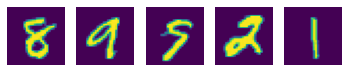

In [4]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, y, test_size=0.9, train_size=0.1)
x_train, x_test, y_train, y_test = train_test_split( X_TEST, Y_TEST, test_size=0.15)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split( X_TRAIN, Y_TRAIN, test_size=0.15)

print('Train set size short = ', x_train_s.shape[0])
print('Test set size short  = ', x_test_s.shape[0])

print('Train set size = ', x_train.shape[0])
print('Test set size = ', x_test.shape[0])

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i], (28,28)))

# Logistic Regression

In [21]:
hyperParameters = {
    'penalty':['l1','l2'],
    'tol':[0.01, 0.1, 1],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

best_model = None
best_params = {
    'penalty':'l1',
    'tol':0.01,
    'solver':'newton-cg'
}

best_acc_score = 0

size = len(hyperParameters['penalty'])*len(hyperParameters['tol'])*len(hyperParameters['solver'])
counter = 1

for penalty in hyperParameters['penalty']:
    for tol in hyperParameters['tol']:
        for solver in hyperParameters['solver']:
            print("\r{0}/{1} : Penalty: {2} | Tol: {3} | Solver: {4}".format(counter, size, penalty, tol, solver), end='')
            counter += 1
            try:
                model = LogisticRegression(penalty=penalty, tol=tol, solver=solver, max_iter=2000)
                model.fit(x_train_s, y_train_s)
                acc_score = accuracy_score(y_test_s, model.predict(x_test_s))
                if acc_score > best_acc_score:
                    best_params['penalty'] = penalty
                    best_params['tol'] = tol
                    best_params['solver'] = solver
                    best_acc_score = acc_score
                    best_model = model
            except Exception as ex:
                continue

print("\rBest model params: \nPenalty: {0} | Tol: {1} | Solver: {2} - > Accuracy = {3}".format(best_params['penalty'], best_params['tol'], best_params['solver'], best_acc_score))

Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.9142857142857143


In [22]:
best_model.fit(x_train, y_train)
print("Accuracy: ", accuracy_score(y_test, best_model.predict(x_test)))

Accuracy:  0.9225396825396825


# KNN

In [7]:
hyperParameters = {
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2],
    'n_neighbors':[1, 3, 5, 7]
}

best_model = None
best_params = {
    'algorithm' : 'ball_tree',
    'p' : 1,
    'n_neighbors':1
}

best_acc_score = 0

size = len(hyperParameters['algorithm'])*len(hyperParameters['p'])*len(hyperParameters['n_neighbors'])
counter = 1

for algorithm in hyperParameters['algorithm']:
    for p in hyperParameters['p']:
        for n_neighbors in hyperParameters['n_neighbors']:
            print("\r{0}/{1} : Algorithm: {2} | P: {3} | N_neighbors: {4}".format(counter, size, algorithm, p, n_neighbors), end='')
            counter += 1
            try:
                model = KNeighborsClassifier(algorithm=algorithm, p=p, n_neighbors=n_neighbors)
                model.fit(x_train_s, y_train_s)
                acc_score = accuracy_score(y_test_s, model.predict(x_test_s))
                if acc_score > best_acc_score:
                    best_params['algorithm'] = algorithm
                    best_params['p'] = p
                    best_params['n_neighbors'] = n_neighbors
                    best_acc_score = acc_score
                    best_model = model
            except Exception as ex:
                continue

print("\rBest model params: \nAlgorithm: {0} | P: {1} | N_neighbors: {2} - > Accuracy = {3}".format(best_params['algorithm'], best_params['p'], best_params['n_neighbors'], best_acc_score))

Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 3 - > Accuracy = 0.9361904761904762


In [8]:
best_model.fit(x_train, y_train)
print("Accuracy: ", accuracy_score(y_test, best_model.predict(x_test)))

Accuracy:  0.9731216931216932


# Decision Tree

In [16]:
hyperParameters = {
    'criterion' : ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth':[i for i in range(5, 20)]
}

best_model = None
best_params = {
    'criterion' : 'ball_tree',
    'splitter' : 1,
    'max_depth':1
}

best_acc_score = 0

size = len(hyperParameters['criterion'])*len(hyperParameters['splitter'])*len(hyperParameters['max_depth'])
counter = 1

for criterion in hyperParameters['criterion']:
    for splitter in hyperParameters['splitter']:
        for max_depth in hyperParameters['max_depth']:
            print("\r{0}/{1} : Criterion: {2} | Splitter: {3} | Max_depth: {4}".format(counter, size, criterion, splitter, max_depth), end='')
            counter += 1
            try:
                model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
                model.fit(x_train_s, y_train_s)
                acc_score = accuracy_score(y_test_s, model.predict(x_test_s))
                if acc_score > best_acc_score:
                    best_params['criterion'] = criterion
                    best_params['splitter'] = splitter
                    best_params['max_depth'] = max_depth
                    best_acc_score = acc_score
                    best_model = model
            except Exception as ex:
                continue

print("\rBest model params: \nCriterion: {0} | Splitter: {1} | Max_depth: {2} - > Accuracy = {3}".format(best_params['criterion'], best_params['splitter'], best_params['max_depth'], best_acc_score))

Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 14 - > Accuracy = 0.8152380952380952


In [15]:
best_model.fit(x_train, y_train)
print("Accuracy: ", accuracy_score(y_test, best_model.predict(x_test)))

Accuracy:  0.8842328042328043


# SVM

In [17]:
hyperParameters = {
    'c' : [0.1, 0.2, 0.5, 1, 2, 5],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'tol':[0.001, 0.01, 0.1, 1]
}

best_model = None
best_params = {
    'c' : 0.1,
    'kernel' : 'linear',
    'tol':0.001
}

best_acc_score = 0

size = len(hyperParameters['c'])*len(hyperParameters['kernel'])*len(hyperParameters['tol'])
counter = 1

for c in hyperParameters['c']:
    for kernel in hyperParameters['kernel']:
        for tol in hyperParameters['tol']:
            print("\r{0}/{1} : C: {2} | Kernel: {3} | Tol: {4}".format(counter, size, c, kernel, tol), end='')
            counter += 1
            try:
                model = SVC()
                model.fit(x_train_s, y_train_s)
                acc_score = accuracy_score(y_test_s, model.predict(x_test_s))
                if acc_score > best_acc_score:
                    best_params['c'] = c
                    best_params['kernel'] = kernel
                    best_params['tol'] = tol
                    best_acc_score = acc_score
                    best_model = model
            except Exception as ex:
                continue

print("\rBest model params: \nC: {0} | Kernel: {1} | Tol: {2} - > Accuracy = {3}".format(best_params['c'], best_params['kernel'], best_params['tol'], best_acc_score))

Best model params: 
C: 0.1 | Kernel: linear | Tol: 0.001 - > Accuracy = 0.9571428571428572


In [18]:
best_model.fit(x_train, y_train)
print("Accuracy: ", accuracy_score(y_test, best_model.predict(x_test)))

Accuracy:  0.9811640211640211
